In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# read data
file = 'game_teams_stats.csv'

#read CSV into df
data = pd.read_csv(file)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 52610 non-null  int64  
 1   team_id                 52610 non-null  int64  
 2   HoA                     52610 non-null  object 
 3   won                     52610 non-null  bool   
 4   settled_in              52610 non-null  object 
 5   head_coach              52582 non-null  object 
 6   goals                   52602 non-null  float64
 7   shots                   52602 non-null  float64
 8   hits                    47682 non-null  float64
 9   pim                     52602 non-null  float64
 10  powerPlayOpportunities  52602 non-null  float64
 11  powerPlayGoals          52602 non-null  float64
 12  faceOffWinPercentage    30462 non-null  float64
 13  giveaways               47682 non-null  float64
 14  takeaways               47682 non-null

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left


In [3]:
#data = data.dropna()    #dropping rows with NA-values reduced entries from 52610 to 29554

#create a column for pp%
data['powerPlayPercentage'] = (data['powerPlayGoals'] / data['powerPlayOpportunities'])

#reorder columns
column_order = ['game_id', 'team_id', 'HoA', 'won', 'settled_in', 'head_coach', 'goals', 'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals', 'powerPlayPercentage', 'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked', 'startRinkSide']
data = data[column_order]
data = data.groupby('game_id').filter(lambda x: len(x) == 2)
data.info()



#make an aleternative df where numerical values are normalized to [0, 1]
scaler = MinMaxScaler()
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data_norm = data.copy()
data_norm[num_cols] = scaler.fit_transform(data[num_cols])
data_norm.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42330 entries, 0 to 46669
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 42330 non-null  int64  
 1   team_id                 42330 non-null  int64  
 2   HoA                     42330 non-null  object 
 3   won                     42330 non-null  bool   
 4   settled_in              42330 non-null  object 
 5   head_coach              42302 non-null  object 
 6   goals                   42322 non-null  float64
 7   shots                   42322 non-null  float64
 8   hits                    37402 non-null  float64
 9   pim                     42322 non-null  float64
 10  powerPlayOpportunities  42322 non-null  float64
 11  powerPlayGoals          42322 non-null  float64
 12  powerPlayPercentage     41806 non-null  float64
 13  faceOffWinPercentage    20182 non-null  float64
 14  giveaways               37402 non-null

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,powerPlayPercentage,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,0.841661,0.056604,away,False,REG,Dave Hakstol,0.333333,0.421875,0.3750,0.028169,0.2500,0.285714,0.500000,0.642677,0.230769,0.225,0.255814,left
1,0.841661,0.283019,home,True,REG,Joel Quenneville,0.583333,0.437500,0.2500,0.037559,0.1875,0.285714,0.666667,0.619949,0.307692,0.200,0.209302,left
2,0.894305,0.433962,away,True,OT,Randy Carlyle,0.333333,0.531250,0.2000,0.028169,0.1875,0.142857,0.333333,0.553030,0.134615,0.100,0.325581,right
3,0.894305,0.113208,home,False,OT,Phil Housley,0.250000,0.515625,0.2125,0.037559,0.1250,0.142857,0.500000,0.709596,0.096154,0.150,0.325581,right
4,0.789071,0.377358,away,True,REG,Patrick Roy,0.333333,0.453125,0.2125,0.042254,0.1875,0.142857,0.333333,0.577020,0.250000,0.125,0.465116,left


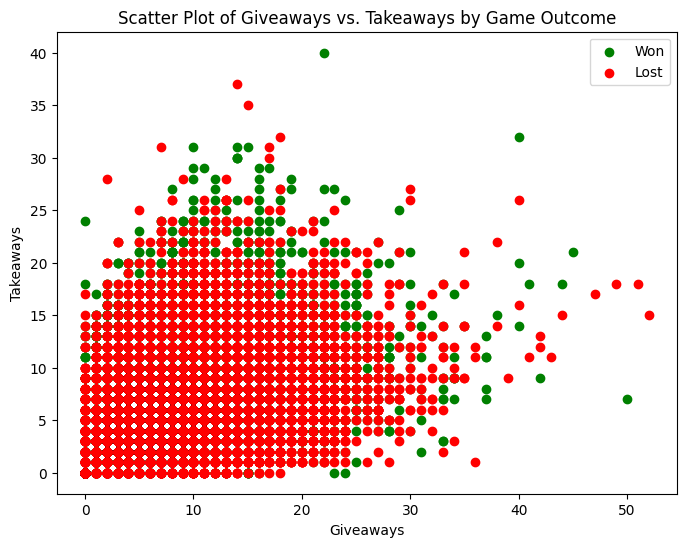

In [4]:
# Split the DataFrame into two based on the "won" column
df_won = data[data['won'] == True]
df_lost = data[data['won'] == False]

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot giveaways vs. takeaways for games won (color green)
plt.scatter(df_won['giveaways'], df_won['takeaways'], color='green', label='Won')

# Plot giveaways vs. takeaways for games lost (color red)
plt.scatter(df_lost['giveaways'], df_lost['takeaways'], color='red', label='Lost')

# Set labels and title
plt.xlabel('Giveaways')
plt.ylabel('Takeaways')
plt.title('Scatter Plot of Giveaways vs. Takeaways by Game Outcome')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [5]:
home_team_df = data[data['HoA'] == 'home'].set_index('game_id')
away_team_df = data[data['HoA'] == 'away'].set_index('game_id')

# Merge the two DataFrames based on 'game_id'
combined_df = home_team_df.merge(away_team_df, on='game_id', suffixes=('_home', '_away'))

# Reset the index to have 'game_id' as a column
combined_df.reset_index(inplace=True)
combined_df = combined_df.reindex(sorted(combined_df.columns), axis=1)
new_order = ['game_id'] + [col for col in combined_df.columns if col != 'game_id']
combined_df = combined_df[new_order]
combined_df = combined_df.drop(['faceOffWinPercentage_away', 'faceOffWinPercentage_home', 'HoA_away', 'HoA_home', 'head_coach_away', 'head_coach_home', 'settled_in_away', 'startRinkSide_away', 'startRinkSide_home'], axis=1)
combined_df.rename(columns={'settled_in_home': 'settled_in'}, inplace=True)

print(combined_df.iloc[5])
combined_df.info()
combined_df.head()

game_id                        2016020610
blocked_away                         24.0
blocked_home                         18.0
giveaways_away                        8.0
giveaways_home                       12.0
goals_away                            4.0
goals_home                            1.0
hits_away                            19.0
hits_home                            27.0
pim_away                              8.0
pim_home                              4.0
powerPlayGoals_away                   1.0
powerPlayGoals_home                   1.0
powerPlayOpportunities_away           2.0
powerPlayOpportunities_home           4.0
powerPlayPercentage_away              0.5
powerPlayPercentage_home             0.25
settled_in                            REG
shots_away                           39.0
shots_home                           23.0
takeaways_away                        5.0
takeaways_home                        7.0
team_id_away                           15
team_id_home                      

,game_id,blocked_away,blocked_home,giveaways_away,giveaways_home,goals_away,goals_home,hits_away,hits_home,pim_away,...,powerPlayPercentage_home,settled_in,shots_away,shots_home,takeaways_away,takeaways_home,team_id_away,team_id_home,won_away,won_home
0,2016020045,11.0,9.0,12.0,16.0,4.0,7.0,30.0,20.0,6.0,...,0.666667,REG,27.0,28.0,9.0,8.0,4,16,False,True
1,2017020812,14.0,14.0,7.0,5.0,4.0,3.0,16.0,17.0,6.0,...,0.500000,OT,34.0,33.0,4.0,6.0,24,7,True,False
2,2015020314,20.0,9.0,13.0,13.0,4.0,1.0,17.0,22.0,9.0,...,0.000000,REG,29.0,21.0,5.0,7.0,21,52,True,False
3,2015020849,16.0,13.0,4.0,12.0,1.0,2.0,21.0,16.0,10.0,...,0.400000,REG,21.0,29.0,14.0,11.0,52,12,False,True
4,2017020586,7.0,21.0,10.0,13.0,1.0,2.0,20.0,15.0,19.0,...,0.166667,REG,23.0,41.0,4.0,4.0,20,24,False,True


## DROP DATA THAT GIVES AWAY THE RESULT; GOALS ETC

In [13]:
updated_df = combined_df.drop(["game_id", "goals_away", "goals_home"], axis=1)
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21165 entries, 0 to 21164
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   blocked_away                 18701 non-null  float64
 1   blocked_home                 18701 non-null  float64
 2   giveaways_away               18701 non-null  float64
 3   giveaways_home               18701 non-null  float64
 4   hits_away                    18701 non-null  float64
 5   hits_home                    18701 non-null  float64
 6   pim_away                     21161 non-null  float64
 7   pim_home                     21161 non-null  float64
 8   powerPlayGoals_away          21161 non-null  float64
 9   powerPlayGoals_home          21161 non-null  float64
 10  powerPlayOpportunities_away  21161 non-null  float64
 11  powerPlayOpportunities_home  21161 non-null  float64
 12  powerPlayPercentage_away     20843 non-null  float64
 13  powerPlayPercent

## Make data binary for association rule mining